# Project Name: House Price Prediction

Import Libraries

In [1]:
import numpy as np


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Load Dataset

In [7]:
df = pd.read_csv("california_housing.csv")

In [8]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                  41          880           129.0  \
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [9]:
print(df.shape)

(20640, 10)


In [25]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


Basic Data Checks

In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [11]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


dropping missing values

In [12]:
df = df.dropna()

Exploratory Data Analysis (EDA)

Summary statistics

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Correlation heatmap

In [18]:
numeric_df = df.select_dtypes(include=[np.number])

In [19]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

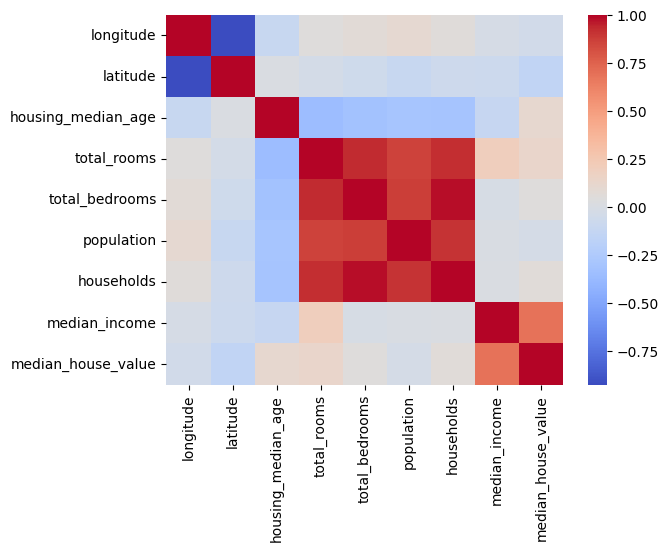

In [20]:
sns.heatmap(numeric_df.corr(), cmap="coolwarm")


Text(0.5, 1.0, 'Feature Correlation (Numeric Features Only)')

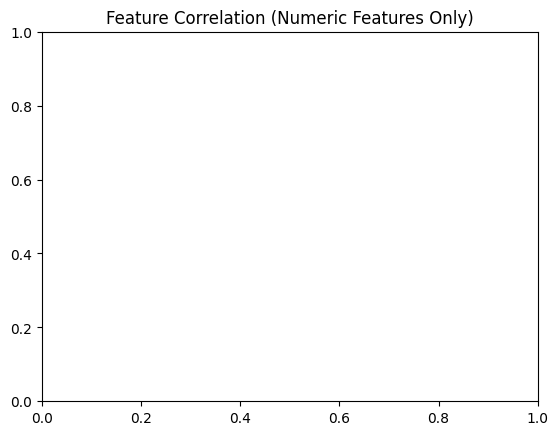

In [21]:
plt.title("Feature Correlation (Numeric Features Only)")

In [22]:
plt.show()

Split Features and Target

In [26]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

Encode Categorical Feature

In [28]:
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)


In [29]:
print(X.head())
print(X.shape)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                  41          880           129.0  \
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity_INLAND   
0         322         126         8.3252                   False  \
1        2401        1138         8.3014                   False   
2         496         177         7.2574                   False   
3         558         219         5.6431                   False   
4         565         259         3.8462                   False   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY   
0                   False                      True  \
1                   False     

Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature Scaling (for Linear Regression)

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model 1: Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred_lr = lr.predict(X_test_scaled)

In [35]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [36]:
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression RMSE: 69297.7166911303
Linear Regression R²: 0.6488402154431994


Model 2: Random Forest Regressor

In [37]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
y_pred_rf = rf.predict(X_test)


In [40]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


In [41]:
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)


Random Forest RMSE: 48767.9945206636
Random Forest R²: 0.8260851299316047


Model Comparison

In [42]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

print(results)

               Model          RMSE  R2 Score
0  Linear Regression  69297.716691  0.648840
1      Random Forest  48767.994521  0.826085


Feature Importance

In [43]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

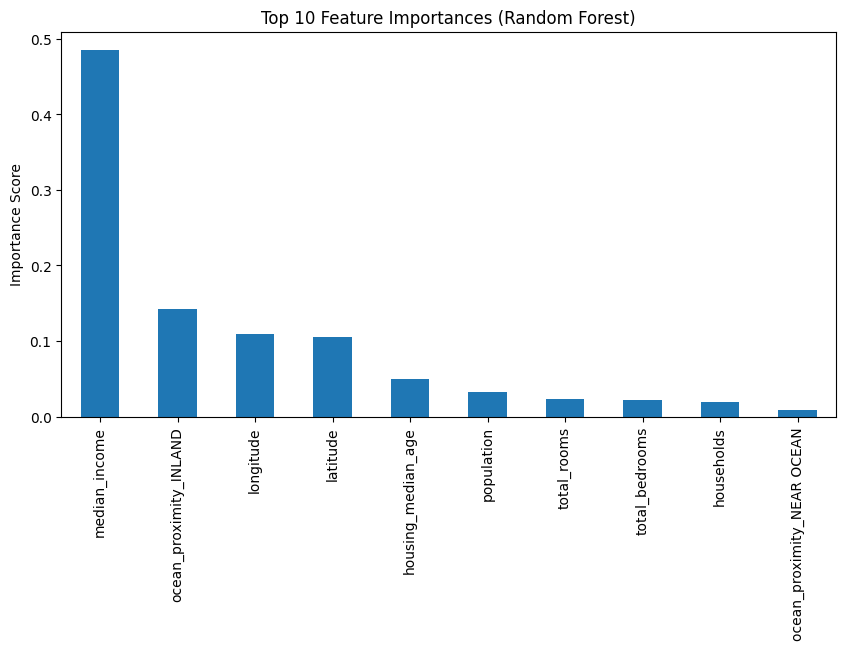

In [44]:
plt.figure(figsize=(10,5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

In [45]:
predictions = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_rf
})

predictions.to_csv("predictions.csv", index=False)

In [46]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)